In [132]:
#importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [4]:
test_data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199


In [5]:
print('The shape of train is {} and test is {}'.format(train_data.shape, test_data.shape))

The shape of train is (381109, 12) and test is (127037, 11)


In [6]:
print('The unique values is' ,train_data.apply(lambda x : len(x.unique())))

The unique values is id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64


In [7]:
print('The unique values is' ,test_data.apply(lambda x : len(x.unique())))

The unique values is id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64


In [8]:
combine_data = train_data.append(test_data,sort= False, ignore_index=True)
combine_data.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0


In [9]:
combine_data.shape

(508146, 12)

In [10]:
#Missing_Values Treatment
df1 = combine_data.isnull().sum().to_frame().rename(columns = {0:'Train_Null_Values'})
df2 = combine_data.dtypes.to_frame().rename(columns = {1:'Dtypes'})
df = pd.concat([df1, df2], axis=1)
df

#Response is Target variable(Hence no missing values)

,Train_Null_Values,0
id,0,int64
Gender,0,object
Age,0,int64
Driving_License,0,int64
Region_Code,0,float64
Previously_Insured,0,int64
Vehicle_Age,0,object
Vehicle_Damage,0,object
Annual_Premium,0,float64
Policy_Sales_Channel,0,float64


In [11]:
combine_data_dictvehicle = {'Yes':1,'No':0}
combine_data['Vehicle_Damage']= combine_data['Vehicle_Damage'].map(combine_data_dictvehicle) 

In [12]:
combine_data['Gender'] = combine_data['Gender'].map({'Female':0,'Male':1})

In [13]:
combine_datas = combine_data.copy()

In [14]:
combine_datas['Region_Code'] = combine_datas['Region_Code'].astype(int)
combine_datas['Annual_Premium'] = combine_datas['Annual_Premium'].astype(int)
combine_datas['Policy_Sales_Channel'] = combine_datas['Policy_Sales_Channel'].astype(int)
#combine_datas['Response'] = combine_datas['Response'].astype(int)

In [15]:
combine_datas['Vehicle_Age'] = combine_datas['Vehicle_Age'].str.replace('Year','') 
combine_datas['Vehicle_Age'] = combine_datas['Vehicle_Age'].str.replace('s','')

In [16]:
combine_datas['Vehicle_Age'] = combine_datas['Vehicle_Age'].map({'> 2 ':2,'1-2 ':1,'< 1 ':0})

In [17]:
combine_datas.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1.0
1,2,1,76,1,3,0,1,0,33536,26,183,0.0
2,3,1,47,1,28,0,2,1,38294,26,27,1.0
3,4,1,21,1,11,1,0,0,28619,152,203,0.0
4,5,0,29,1,41,1,0,0,27496,152,39,0.0


In [19]:
train_data['Response'].value_counts(normalize = True)  #Imbalanced_Dataset

0    0.877437
1    0.122563
Name: Response, dtype: float64

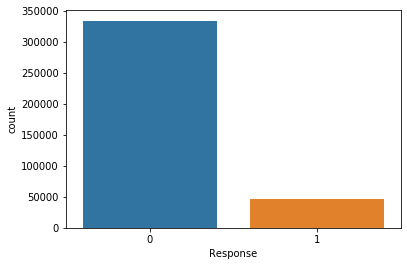

In [18]:
sns.countplot(train_data['Response'])

In [31]:
#Univariate analysis
def univar_graph(df, col, vartype):
    plt.figure(figsize = (12,4))
    sns.countplot(combine_datas[col], hue=combine_datas['Response'])
    plt.ylabel('Lead Number')
    plt.xlabel(col)
    plt.xticks(rotation=90)


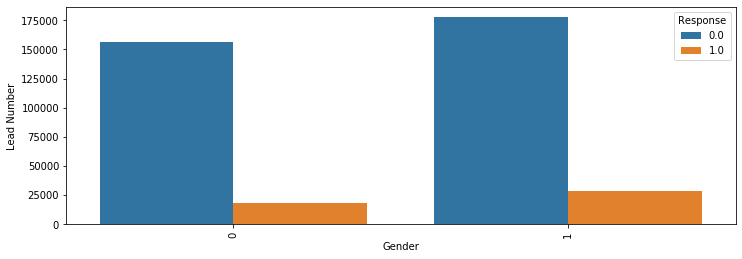

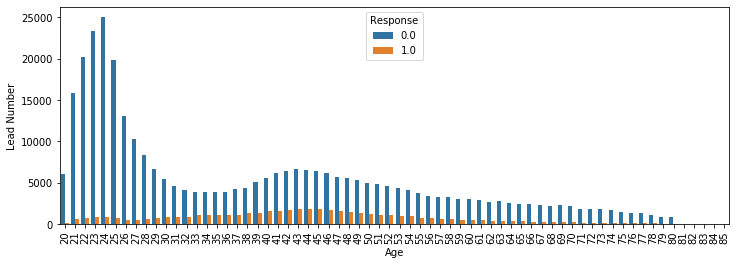

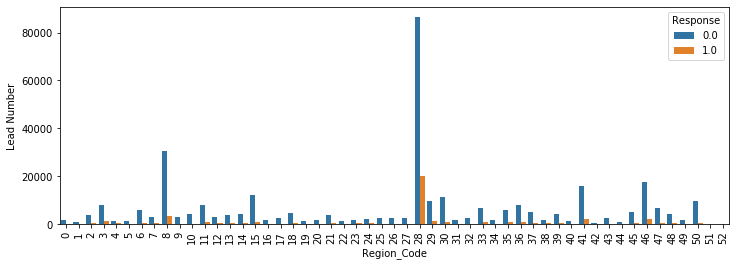

In [35]:
col_graph = combine_datas[['Gender', 'Age', 'Region_Code']]
for item in col_graph:
    univar_graph(df=combine_datas,col=item,vartype=1)

In [113]:
def outlier_graph(df, col, vartype):
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(combine_datas[col],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data =combine_datas, x=col,ax=ax[1],orient='v')


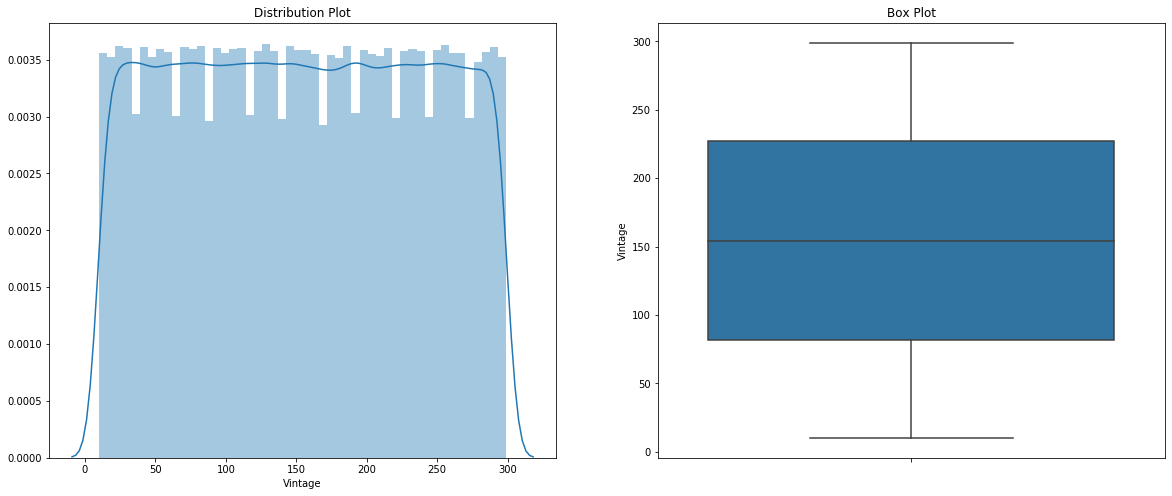

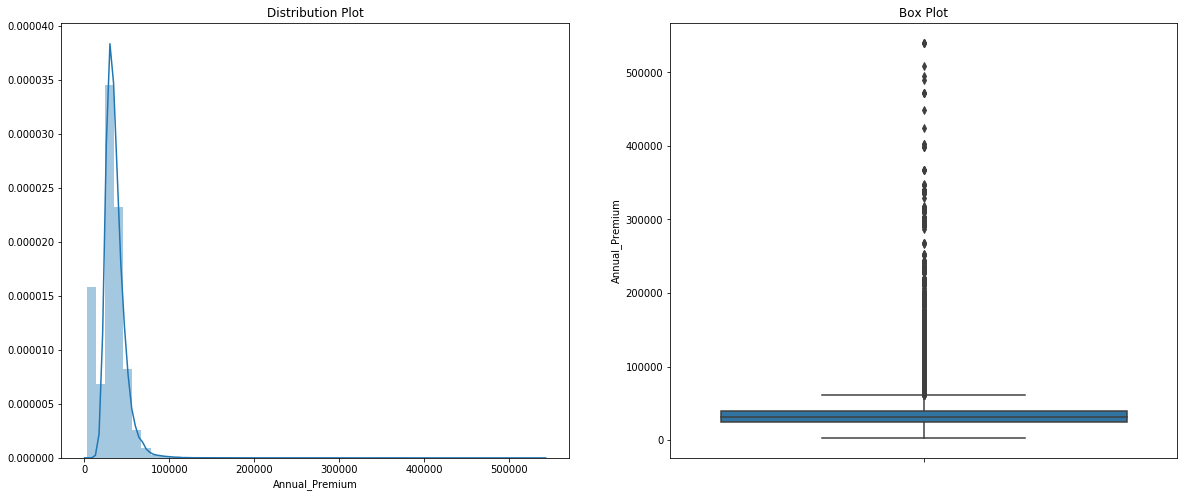

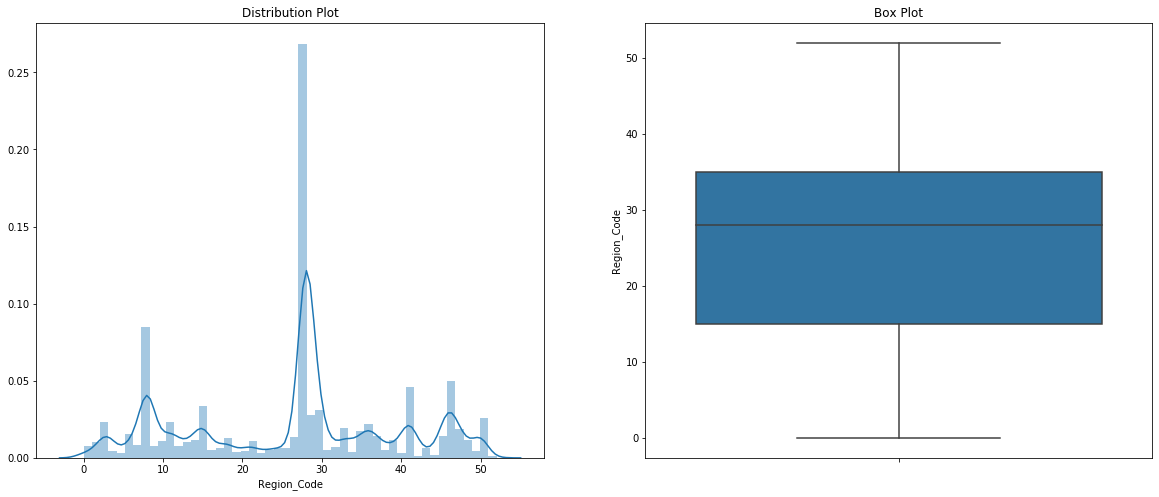

In [116]:
col_graph = combine_datas[['Vintage', 'Annual_Premium', 'Region_Code']]
for item in col_graph:
    outlier_graph(df=combine_datas,col=item,vartype=1)

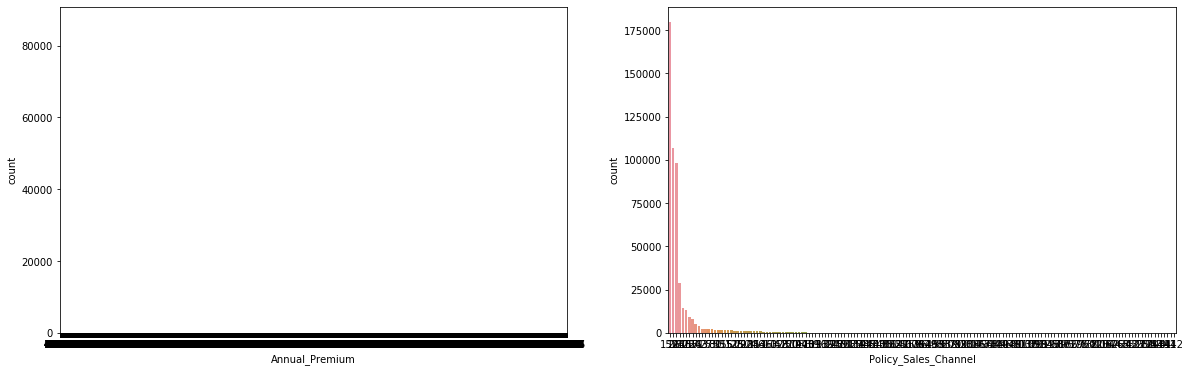

In [97]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(combine_datas['Annual_Premium'], order = combine_datas['Annual_Premium'].value_counts(dropna=False).index)
plt.subplot(122)
sns.countplot(combine_datas['Policy_Sales_Channel'], order = combine_datas['Policy_Sales_Channel'].value_counts(dropna=False).index)

In [38]:
combine_datas.Vehicle_Age.unique()

array([2, 1, 0], dtype=int64)

In [40]:
combine_datas.Vehicle_Damage.unique()

array([1, 0], dtype=int64)

In [41]:
def combining_data(z):
    x = z[0]
    y =z[1]
    if (x==0) & (y==0):
        return 0.99
    elif (x==0) & (y==1):
        return 0.8
    elif (x==0) & (y==2):
        return 0.5
    if (x==1) & (y==0):
        return 0.75
    elif (x==1) & (y==1):
        return 0.55
    elif (x==1) & (y==2):
        return 0.25

In [44]:
combine_datas['damage_age']= combine_datas[['Vehicle_Damage','Vehicle_Age']].apply(combining_data, axis =1)

In [46]:
combine_datas.drop(['Vehicle_Damage','Vehicle_Age'], axis =1,inplace = True)

In [47]:
combine_datas.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,damage_age
0,1,1,44,1,28,0,40454,26,217,1.0,0.25
1,2,1,76,1,3,0,33536,26,183,0.0,0.80
2,3,1,47,1,28,0,38294,26,27,1.0,0.25
3,4,1,21,1,11,1,28619,152,203,0.0,0.99
4,5,0,29,1,41,1,27496,152,39,0.0,0.99


In [61]:
combine_datas_Check = combine_datas[['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium', 'damage_age','Policy_Sales_Channel',
       'Vintage', 'Response']]
cols = list(combine_datas_Check.columns.values)

In [67]:
combine_datas_Check.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,damage_age,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,40454,0.25,26,217,1.0
1,2,1,76,1,3,0,33536,0.80,26,183,0.0
2,3,1,47,1,28,0,38294,0.25,26,27,1.0
3,4,1,21,1,11,1,28619,0.99,152,203,0.0
4,5,0,29,1,41,1,27496,0.99,152,39,0.0


In [110]:
bins=[20,35,50,69,85]
group = ['miniadult','adult','grownup','old']
combine_datas_Check['Age'] = pd.cut(combine_datas_Check['Age'], bins, labels = group)
combine_datas_Check['Age'] = combine_datas_Check['Age'].map({"miniadult":0,'adult':1,'grownup':2,'old':3})

In [111]:
combine_datas_Check.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,damage_age,Policy_Sales_Channel,Vintage,Response
0,1,1,1,1,28,0,40454,0.25,26,217,1.0
1,2,1,3,1,3,0,33536,0.80,26,183,0.0
2,3,1,1,1,28,0,38294,0.25,26,27,1.0
3,4,1,0,1,11,1,28619,0.99,152,203,0.0
4,5,0,0,1,41,1,27496,0.99,152,39,0.0


In [112]:
combine_datas_Check.groupby(['Age','Driving_License','Previously_Insured'])[['Annual_Premium']].median()

Annual_Premium
Age Driving_License Previously_Insured                
0   0               0                          28244.5
                    1                          38728.5
    1               0                          30162.0
                    1                          30563.0
1   0               0                          33348.5
                    1                          37284.0
    1               0                          32828.0
                    1                          31190.5
2   0               0                          35352.5
                    1                          33458.0
    1               0                          34596.0
                    1                          33292.5
3   0               0                          37146.0
                    1                          36823.5
    1               0                          35484.0
                    1                          34609.0

In [121]:
train_features = combine_datas_Check.drop(['id', 'Response'], axis = 1)[:381109]
target = combine_datas_Check['Response'][:381109]
test_features = combine_datas_Check.drop(['id', 'Response'], axis = 1)[381109:]

In [122]:
train_features.shape,target.shape,test_features.shape

((381109, 9), (381109,), (127037, 9))

In [127]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [146]:
##split the data for testing and training with 25% test size
X_train,X_test,y_train,y_test = train_test_split(train_features,target,test_size=0.2)

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [150]:
def fit_model(X, y, model_name='lr', model_type=LogisticRegression()):
    
    # Pipeline for pre-processing
    pipe = Pipeline([
        ('scale', StandardScaler()),
        (model_name, model_type)
    ])
    # Fit the model 
    model = pipe.fit(X, y)
    
    #Score
    score = model.score(X, y)
                   
    # Print attributes
    print(f"For model: {model_type}")
#     print(f"Score: {score}")
    
    return model

In [151]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Evaluate training data
    preds_train = model.predict(X_train)
    score_train = model.score(X_train, y_train)

    # Evaluate testing data
    preds_test = model.predict(X_test)
    score_test = model.score(X_test, y_test)
    
    # Print results
    
    print(f'Train Score: {score_train:.4f}')
    print(f'Test Score: {score_test:.4f}')

In [152]:
logreg = fit_model(X_train, y_train, model_name='logreg', model_type=LogisticRegression())
evaluate_model(logreg, X_train, X_test, y_train, y_test)

For model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Train Score: 0.8759
Test Score: 0.8771


In [153]:
dtc = fit_model(X_train, y_train, model_name='dtc', model_type=DecisionTreeClassifier())

evaluate_model(dtc, X_train, X_test, y_train, y_test)

For model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Train Score: 0.9980
Test Score: 0.8232


In [154]:
rf = fit_model(X_train, y_train, model_name='rf', model_type=RandomForestClassifier())

evaluate_model(rf, X_train, X_test, y_train, y_test)

For model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Train Score: 0.9980
Test Score: 0.8587


In [155]:

ada = fit_model(X_train, y_train, model_name='ada', model_type=AdaBoostClassifier())

evaluate_model(ada, X_train, X_test, y_train, y_test)

For model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Train Score: 0.8772
Test Score: 0.8784


In [157]:
RFC = RandomForestClassifier()

#fit the data
RFC.fit(X_train,y_train)

#Predicting_over_train
y_pred = RFC.predict(X_train)
#print("Predicting over train set",y_pred)

#Predicting over test
test4_pred = RFC.predict(X_test)
#print('predicting over test set',test_pred)

count_misclassified = (y_test != test4_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

from sklearn import metrics
accuracy_rfc = metrics.accuracy_score(y_test , test4_pred)
print('Accuracy: {:.2f}'.format((accuracy_rfc)*100))

print('Training dataset {} and testing dataset {}'.format(X_train.shape,X_test.shape))


Misclassified samples: 10734
Accuracy: 85.92
Training dataset (304887, 9) and testing dataset (76222, 9)


In [168]:
## making combining of  of all the models out put 
from scipy.stats import mode
pred1 = mode(test40_pred,0)

In [169]:
ID = test_data['id'].values

In [170]:
df_submit = pd.DataFrame({'ID': ID, 'Prediction': pred1.mode[0]}) # Ensemble submission
df_submit.to_csv("submit2020.csv", index=False)

In [165]:
std = StandardScaler()
X1_test = std.fit_transform(test_features)

In [167]:
test40_pred = RFC.predict(X1_test)

In [172]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, test4_pred)


print(auc_score1)

0.5585401025177509
